# Advanced Statistics

- Population and Sample
- Variation of Sample - Understand Distribution of Sample Mean
- Confidence Interval - Estimate the average stock return
- Hypothesis Testing - Validate the claim of average stock return

We know that, when doing financial analysis, identifying important variables is important in helping us making better predictions and decisions. 

We have also learned the distribution of random variables. 

We learned how to apply normal distribution to model a stock return, and evaluate the risk of extreme events. 

In this topic, we will explain statistical inference, which is a core part of statistics. 

In financial analysis, we're concerned about characteristics of some targets called a population.

For example, we want to make use of historical data of a couple years, called sample, to estimate the real mean return of some private equity funds.

Sometimes, we also want to testify some claims. For example, if the fund managers claim that their investment strategy can generate 30% yearly return, we have to validate this claim using data of the last 20 years.

These two applications are typical tasks of statistical inference to infer the promptings of interesting targets. 

- First, we will talk about population, samples and random sampling. 
- We will find out the distribution of sample mean. 
- We will learn how to use confidence interval to estimate population mean, for example, the average data return. 
- We will learn hypothesis testing, will be introduced and applied in validating some claims about the mean return.

## Population and Sample

Population is a group of individuals who have something in common. 

We may be interested in some properties about a certain group, which we call target population, that cannot be observed completely. 

For example, all registered voters in Thailand, or all Hong Kong citizens who played golf at least once past year, or all neurons from your brain.

Since we cannot get information for every individual of these populations, we have to take SAMPLE, which is a part of target population.

Sample is a small group of population. It is a representative of the population, hence, it has to be randomly selected. This process is called random sampling.

Sampling:

There are two kinds of sampling, called a sampling without replacement, or with replacement, depending on whether you put the select individuals back into population before you select the next one.

In a sampling without replacement, an individual is randomly selected from the population. The next individual will be selected without putting the previous individual back.

Every individual is selected from a different pool. If the population size is very large, this method is a factor because it can generate a random sample with different individuals.

There is another kind of sampling method, sampling with replacement.

A randomly selected individual will be put back before the next individual being selected. Hence, it is possible that the same individual can be selected more than once.

When the population is small, this method can make sure that everyone in the population has the same chance being selected.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels 
from scipy.stats import norm
# import os

In [2]:
# Create a Population DataFrame with 10 data 

data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

As you can see we got 48 twice

In [3]:
# Draw sample with replacement, size=5 from Population

a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement)

7    16
8    50
2    85
3    20
0    47
Name: Population, dtype: int64


In [4]:
# Draw sample without replacement, size=5 from Population

a_sample_without_replacement = data['Population'].sample(5, replace=False)
print(a_sample_without_replacement)

4    19
6    72
7    16
5    13
0    47
Name: Population, dtype: int64


### Parameters and Statistics

Parameter is a characteristic or summary number of populations.
Statistic is a characteristic or summary number of sample.

Parameters:
- Mean
- Variance
- Standard Deviation

Statistics:
- Sample Mean
- Sample Variance
- Sample Standard Deviation

For example, mean, variance, standard deviation of population are characteristics of population.Once target populations are fixed, these summary numbers will not change.

Sample also has mean, variance, and standard deviation, but their values changes in different samples, even if they are drawn from the same population.

### Population Parameters

I apologize for the inconvenience. It seems that the markdown formatting might not be rendering properly for you. If you're still facing issues, here's a simplified version of the equations using standard text formatting:

**Population Mean:**
The population mean (μ) is calculated as the sum of all values in a population divided by the total number of values (N):

μ = (x₁ + x₂ + ... + xₙ) / N

**Population Variance:**
The population variance (σ²) measures the average squared difference between each data point (xᵢ) and the population mean (μ):

σ² = ((x₁ - μ)² + (x₂ - μ)² + ... + (xₙ - μ)²) / N

**Population Standard Deviation:**
The population standard deviation (σ) is the square root of the population variance. It represents the typical deviation of data points from the population mean:

σ = √(((x₁ - μ)² + (x₂ - μ)² + ... + (xₙ - μ)²) / N)

Feel free to copy and paste this text-based representation into your Jupyter Notebook. While it may not be as visually elegant as using LaTeX-based equations, it should still convey the formulas accurately.

In [5]:
# Calculate mean and variance
population_mean = data['Population'].mean()
population_var = data['Population'].var(ddof=0)
population_std = data['Population'].std(ddof=0)
population_size = data['Population'].shape[0]

# NOTICE ddof = 0 Because we use N in population 
# Which means the denominator of the population variance is N, which is the number of the population

print('Population mean is ', population_mean)
print('Population variance is', population_var)
print('Population standard deviation is', population_std)
print('Population size is', population_size)

Population mean is  43.0
Population variance is 571.8
Population standard deviation is 23.912339910598458
Population size is 10


### Sample Statistics

Certainly! Here are the equations and formulas for sample mean, variance, and standard deviation, formatted in Jupyter Notebook Markdown:

### Sample Mean:
The sample mean (\(\bar{x}\)) is the average of a set of data points.

Equation:

x̄ = (1 / n) * Σ(xᵢ)


Where:
- \(\bar{x}\) is the sample mean.
- \(n\) is the number of data points.
- \(x_i\) represents each individual data point.

### Sample Variance:
The sample variance (\(s^2\)) measures the dispersion or spread of data points around the sample mean.

Equation:

s² = (1 / (n - 1)) * Σ(xᵢ - x̄)²


Where:
- \(s^2\) is the sample variance.
- \(n\) is the number of data points.
- \(\bar{x}\) is the sample mean.
- \(x_i\) represents each individual data point.

### Sample Standard Deviation:
The sample standard deviation (\(s\)) is the square root of the sample variance. It provides a measure of the average deviation of data points from the sample mean.

Equation:

s = √((1 / (n - 1)) * Σ(xᵢ - x̄)²)


Where:
- \(s\) is the sample standard deviation.
- \(n\) is the number of data points.
- \(\bar{x}\) is the sample mean.
- \(x_i\) represents each individual data point.

Feel free to copy and paste these equations and formulas into your Jupyter Notebook Markdown cells. They should render as formatted equations when the Markdown is rendered.

Notice that when we compute a sample variance and std, we need the ddof equal to 1. 

It means the denominator of a sample variance has to be n-1 instead of n, which is the sample size.

In [6]:
# Calculate sample mean and sample standard deviation, size =10
# You will get different mean and varince every time when you excecute the below code

# with replacement
a_sample = data['Population'].sample(10, replace=True)
sample_mean = a_sample.mean()

sample_var = a_sample.var(ddof=1)
sample_std = a_sample.std(ddof=1)

# Notice that when we compute a sample variance and std, we need the ddof equal to 1. 
# It means the denominator of a sample variance has to be n-1 instead of n, which is the sample size.

sample_size = a_sample.shape[0]
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)
print('Sample standard deviation is', sample_std)
print('Sample size is', sample_size)

Sample mean is  47.4
Sample variance is 860.7111111111112
Sample standard deviation is 29.33787843575454
Sample size is 10


In [7]:
# Calculate sample mean and sample standard deviation, size =10
# You will get different mean and varince every time when you excecute the below code

# without replacement
a_sample_2 = data['Population'].sample(10, replace=False)
sample_mean_2 = a_sample_2.mean()

sample_var_2 = a_sample_2.var(ddof=1)
sample_std_2 = a_sample_2.std(ddof=1)

sample_size_2 = a_sample_2.shape[0]
print('Sample mean is ', sample_mean_2)
print('Sample variance is', sample_var_2)
print('Sample standard deviation is', sample_std_2)
print('Sample size is', sample_size_2)

Sample mean is  43.0
Sample variance is 635.3333333333334
Sample standard deviation is 25.20581943387942
Sample size is 10


### Average of an unbiased estimator

To understand why the denominator of the sample variance is n-1, let us generate 500 samples, each sample with size equal to 50. 

We calculate sample variance for each sample using n and n-1 as denominators. 

You'll find that the real population variance is 571.8. 

As you can see, the average of sample variances using n-1 is closer to population variance than using n.

In [8]:
sample_length = 500
sample_variance_collection0=[data['Population'].sample(50, replace=True).var(ddof=0) for i in range(sample_length)]
sample_variance_collection1=[data['Population'].sample(50, replace=True).var(ddof=1) for i in range(sample_length)]

You'll find that the real population variance is 571.8. 

As you can see, the average of sample variances using n-1 is closer to population variance than using n.


The average of sample variance using n as denominator is always smaller than population variance. 

Which is some mathematical reasons. n-1, in fact, is called degrees of freedom. 

For sample variance, there is another explanation why sample variance is divided by n-1, which is the degrees of freedom. 

Degrees of freedom is a number of values used in calculation that are free to variate. 

When we use the sample mean to compute the sample variance, we will lose one degree of freedom.

N = Degrees of freedom
- The number of variables in calculation that are free to variate

In [9]:
print('Population variance is', data['Population'].var(ddof=0))
print('Average of sample variance 0 is', pd.DataFrame(sample_variance_collection0)[0].mean())
print('Average of sample variance 1 is', pd.DataFrame(sample_variance_collection1)[0].mean())

Population variance is 571.8
Average of sample variance 0 is 558.3136576
Average of sample variance 1 is 572.9271910204081


When we compute the variance, using degrees of freedom is better than using sample size. 

In the sense that the average of estimator will be equal to population variance, which is called an unbiased estimator. 

In the next video, we will talk about distribution of sample statistics.

## Variation of Sample

You can compute sample mean, and variance of stock return. 

Based on the statistics, can we show inference to the parameters? 

How close are the statistics to population parameters?

By observing the stock data of 100 days, can we make a claim that this stock is in a upward trend? That is, mean for return is positive. All these rely on our understanding of sample mean distribution.

In [10]:
# Sample mean and SD keep changing, but always within a certain range
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  11.174883038259358
sample SD is  4.369541757140948


If you run the above cell several times, you make a different result from there. 

It is because, the samples are randomly drawn from a normal distribution. 

Different samples will yield different means and standard deviation. This is called the variation of sample.

### Empirical Distribution of mean

To see that, in this code, we generate 1,000 samples from the same population. 

We got mean and variance for each sample and saved in a DataFrame collection. 

Then, we will generate 1000 samples in a loop. 

For each sample, we compute the mean and variance and save them into meanlist and varlist. 


In [11]:
meanlist = []
varlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

Finally, we build an empty DataFrame called collection, the same meanlist and varlist in different columns of this DataFrame. 

We can draw a histogram for the collection of sample means. It looks symmetric and like a normal distribution.

In [12]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

It looks symmetric and like a normal distribution. 

<Axes: >

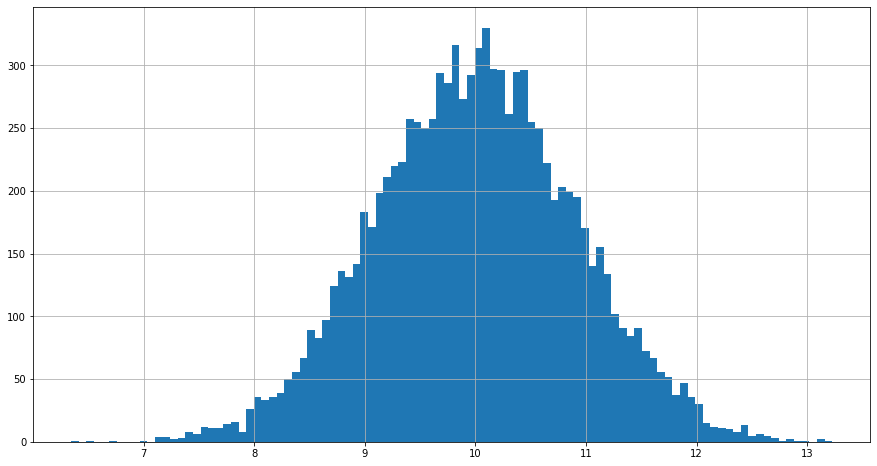

In [13]:
collection['meanlist'].hist(bins=100,figsize=(15,8))

The histogram of sample variance is not normal as you can see it is right-skewed. 

<Axes: >

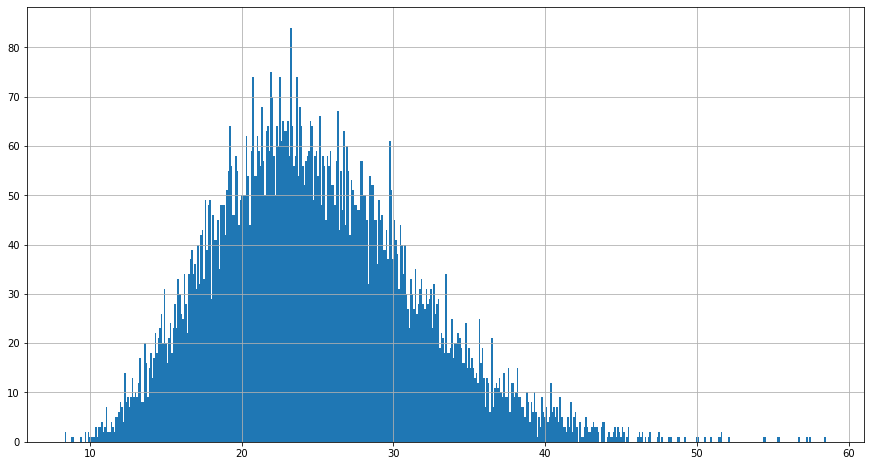

In [14]:
collection['varlist'] = varlist
collection['varlist'].hist(bins=500,figsize=(15,8))

We can guess, in fact, we can mathematically prove that the sample mean has a normal distribution. 

If population is normal with mean equal to Mu and variance equal to sigma square, then the sample mean is also normal, with mean equal to Mu and variance equal to sigma square, divided by sample size N. 

Why variance of the sample mean is smaller than variance of a population? 

Intutionally, the sample mean is the average of N individuals of population, and hence the variation of sample mean is smaller than the variation of individuals in population.

Population is normal N(μ,σ^2)

Sample mean is also normal, N(μ,σ^2/n)

Intutionally, the sample mean is the average of N individuals of population, and hence the variation of sample mean is smaller than the variation of individuals in population. 

<Axes: >

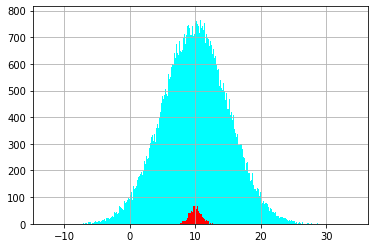

In [15]:
pop = pd.DataFrame(np.random.normal(10,5,size=100000))
                   
pop[0].hist(bins=500,color='cyan')
collection['meanlist'].hist(bins=500,color='red')

# red is population distribution (Sample mean)
# blue is empirical population distribution 

### What if the population is not normal ?

Central limit theory of statistics say, if the sample size is large, the distribution of sample mean looks like normal one with N(μ, σ^2/n) 

Hence, even if the population is not normal, the sample is approximately normal if the sample size is large enough.


Distribution sample mean when the population is not normal:

In [ ]:
# See what central limit theorem tells you...the sample size is larger enough, 
# the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, density=1,figsize=(15,8))

Here's an example about distribution of sample mean when the population is not normal. 

As you can see here, apop is a DataFrame name, which save the population. 

In this population, we only have five values, one, zero, one, zero, one. 

We can generate 100,000 samples with small sample size 10. 

You can see that in this histogram, for sample means, it does not look like a normal distribution. 

But, if you generate 100,000 samples with large sample size 2,000, the distribution of sample mean now looks like a normal distribution. 

## Confidence Interval

We will explore how to estimate the average return using confidence interval 

In [29]:
aapl = pd.read_csv('data/apple.csv',index_col=0)
ms = pd.read_csv('data/microsoft.csv',index_col=0)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700


In [31]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


We can sample mean to estimate the real average return 

which is population mean in our example before

In [32]:
# we will use log return for average stock return of Microsoft

aapl['logReturn'] = np.log(aapl['Close'].shift(-1)) - np.log(aapl['Close'])

ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

In [34]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,logReturn
Date,,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.010474
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.017396
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.007323
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.008185
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.005509


### Estimate the average stock return with 90% Confidence Interval

### Z-Values and Formulas

In statistics, a z-value (also known as a z-score) measures how many standard deviations a data point is away from the mean of a distribution. It's a standardized way to compare individual data points to the overall distribution.

### Z-Score Formula

The formula to calculate the z-score of a data point is:

z = (x - μ) / σ

Where:
- \(x\) is the individual data point,
- \(\mu\) is the mean of the distribution,
- \(\sigma\) is the standard deviation of the distribution.

The resulting \(z\) value tells you how many standard deviations the data point \(x\) is from the mean. A positive z-score indicates that the data point is above the mean, while a negative z-score indicates that it's below the mean.

### Z-Distribution

The z-distribution, also known as the standard normal distribution, is a special case of the normal distribution with a mean of 0 and a standard deviation of 1. The formula for the probability density function (PDF) of the standard normal distribution is:

\[
f(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}
\]

f(z) = 1/root(2π) * e ^ ((-1/2)*z)^2

This distribution is often used as a reference when working with z-values. By converting data points from other distributions to z-scores and referring to the z-distribution, you can make comparisons and calculations more standardized.

### Use Cases

Z-values are commonly used for:
- Identifying outliers: Data points with z-scores far from 0 are considered outliers.
- Hypothesis testing: Z-tests are used to compare sample means to population means.
- Confidence intervals: Z-values are used to calculate the margin of error in confidence intervals.

Remember that the z-score assumes that the data follows a normal distribution. If your data doesn't follow a normal distribution, z-scores might not be as meaningful, and alternative methods may be necessary.


In [37]:
# Lets build 90% confidence interval for log return
sample_size_ms = ms['logReturn'].shape[0]
sample_mean_ms = ms['logReturn'].mean()
sample_std_ms = ms['logReturn'].std(ddof=1) / sample_size_ms**0.5

# left and right quantile
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

# upper and lower bound
interval_left = sample_mean_ms + z_left * sample_std_ms
interval_right = sample_mean_ms + z_right * sample_std_ms


# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".
print('sample mean for AAPL:', sample_mean_ms)
print('90% confidence interval is ', (interval_left, interval_right))

sample mean for AAPL: 0.0008202314861230223
90% confidence interval is  (0.00016900921195778793, 0.0014714537602882566)


In [36]:
# Lets build 90% confidence interval for log return
sample_size_aapl = aapl['logReturn'].shape[0]
sample_mean_aapl = aapl['logReturn'].mean()
sample_std_aapl = aapl['logReturn'].std(ddof=1) / sample_size_aapl**0.5

# left and right quantile
z_left_aapl = norm.ppf(0.1)
z_right_aapl = norm.ppf(0.9)

# upper and lower bound
interval_left = sample_mean_aapl + z_left_aapl * sample_std_aapl
interval_right = sample_mean_aapl + z_right_aapl * sample_std_aapl


# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".
print('sample mean for AAPL:', sample_mean_aapl)
print('90% confidence interval is ', (interval_left, interval_right))

sample mean for AAPL: 0.000975467759150088
90% confidence interval is  (0.0004927367254936755, 0.0014581987928065005)


Notice the above interval is POSITIVE.

It implies that the average return is very likely to be positive.

## Hypothesis Testing

In [39]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,logReturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


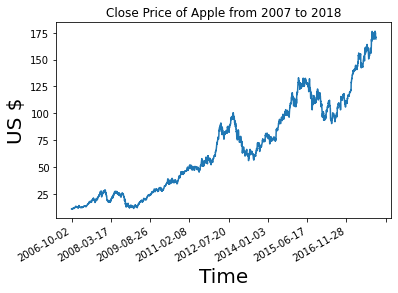

In [45]:
from matplotlib.dates import YearLocator

plt.title("Close Price of Apple from 2007 to 2018")
plt.xlabel("Time", size=20)
plt.ylabel("US $", size=20)

plt.plot(aapl.index, aapl['Close'])

# Create a YearLocator to show only years on the x-axis
years = YearLocator()
plt.gca().xaxis.set_major_locator(years)



plt.gcf().autofmt_xdate()  # Automatically format the date labels for better readability

plt.show()

This is a daily close price of Apple from 2007 to 2018. 

It looks like the price is in an upward trend and we may guess the average of daily return is positive. 

However, if we plot the daily return directly, the daily return goes positive, negative. 

And our assertion that the average of daily return is positive is not obvious.

It is also not obvious whether the average of daily return is 0 or not.

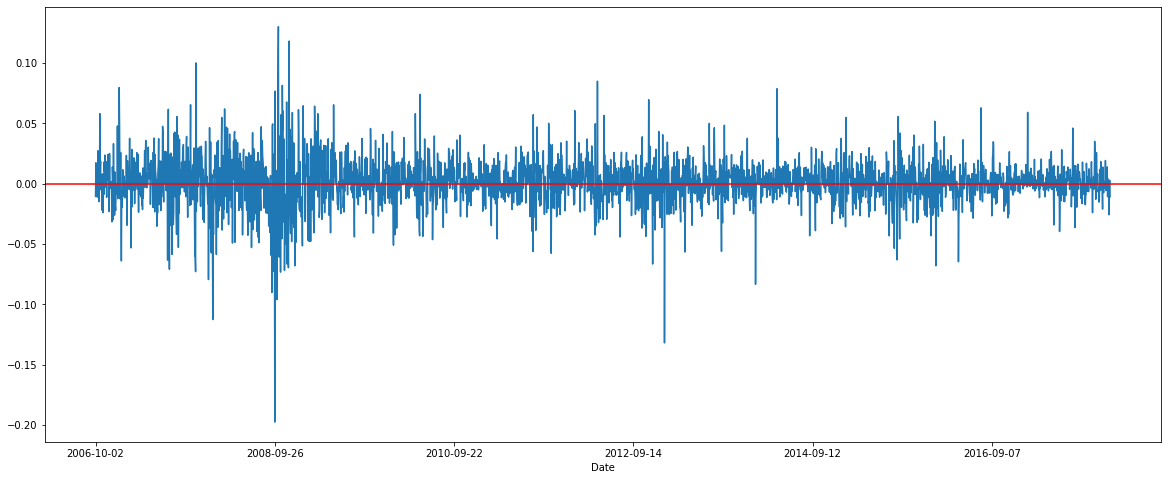

In [46]:
# Log return goes up and down during the period
aapl['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

# Quiz

What is true about sample and population?
- Sample is a subset of population which is randomly draw from population.

You have a DataFrame called ‘data’ which has only one column ‘population’. How to draw sample with sample size =5, from a ‘population’
- data[‘population’].sample(5, replace=True)

Why is the degrees of freedom n-1 in sample variance?
- The degrees of freedom in sample variance is constrained by the sample mean.

What does Central Limit Theorem tell you about the distribution of sample mean?
- The distribution of sample mean follows normal distribution with very large sample size follows normal distribution regardless of the population distribution

Suppose we have 3 independent normal random variables X1, X2 and X3: X1~(μ,σ^2), X2~(μ,σ^2), X3~(μ,σ^2) What is the distribution of X1 + X2 + X3?
- Mean and variance of X1, X2 and X3 are added up, Ν(μ,3σ^2)

Why do we need to standardize sample mean when making inference?
- The standardized distribution of sample mean follows N(O,1) which is easier to make inference 

What can a 95% confidence interval of daily return of an investment tell you?
- With 95% chance this interval will cover the mean of daily return

What is the confidence interval of this exercise (3.5 sample and inference) ?
- [-0.000015603, 0.001656] 

When do you reject a null hypothesis with alternative hypothesis μ>0 with significance level α?
-  p value is smaller than α
-  z < z_(1-α)

When doing analysis of stock return, you notice that with 95% confidence interval, the upper bound and lower bound are negative. Base on this data, what can you tell about this stock?
- There is 95% chance of which the mean return of this stock is negative